# Project: Analysis on the Twitter account of WeRateDogs

## Table of content
 <ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This analysis explores data from WeRateDogs, which is a Twitter account that rates people's dogs with a humorous comment about the dog.

In [1]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


## Gathering

Gathering the 3 dataset needed for the analysis of WeRateDogs twitter account.

In [2]:
archive = pd.read_csv(r'C:\Users\rebecca.ndubuisi\Downloads\twitter-archive-enhanced.csv', encoding= "utf-8")
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_prediction = pd.read_csv(url, sep = '\t')
image_prediction.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [4]:
df = pd.read_json(r"C:\Users\rebecca.ndubuisi\Downloads\tweet.json", lines= True)

tweet_counts = df[['id', 'retweet_count','favorite_count']]
tweet_counts.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Accessing 

### Quality

#### Archive Dataset
* Missing values in 5 columns: (in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id'retweeted_status_user_id','retweeted_status_timestamp'). 
* Change of data types in the tweet_id and timestamp column.
* Change of Timestamp column to just date.
* Rating denominator and numerator columns with suspicious values.
* Treating invalid names in the name column.

#### Image Prediction Dataset
* Some Image Prediction in the P1 not a dog type.
* change of datatypes in tweet_id column. 


#### Tweet Counts Dataset
* ID column needs to be renamed.
* Change datatypes in ID column.






### Tidiness
* Rating columns (rate_denominator and rate_numerator) should be in one column.
* Dog stages in different columns should be treated.

#### Accessing Archive Data.

In [5]:
archive['tweet_id'].duplicated().sum()

0

In [6]:
archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [7]:
archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [8]:
archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [9]:
archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [10]:
archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [11]:
list(archive)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [12]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
archive.shape

(2356, 17)

In [14]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### Accessing Image Prediction Dataset.

In [15]:
image_prediction['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [16]:
image_prediction['tweet_id'].duplicated().sum()

0

In [17]:
image_prediction['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [18]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
image_prediction.shape

(2075, 12)

#### Accessing Tweet Counts Dataset.

In [20]:
tweet_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [21]:
tweet_counts.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [22]:
tweet_counts['id'].duplicated().sum()

0

### Cleaning


In [23]:
archive_clean = archive.copy()
image_clean = image_prediction.copy()
tweet_clean = tweet_counts.copy()

#### Define
Dropping of columns with missing values in the archive dataset. 

#### code

In [24]:
archive_clean = archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
 'retweeted_status_timestamp'], axis = 1)


#### Test

In [25]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Define

Dropping of Dog stages (doggo,floofer,pupper and puppo) columns, more than 80% of its data are not available..

### code

In [26]:
archive_clean = archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1)

#### Test

In [27]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin


#### Define
* Dropping rows with rating denominator greater and less than 10
* Replacing cells with rating numerator greater than 30 with the mean of the column (11).
* Concatenating Rating columns (rate_denominator and rate_numerator) to be in one column.

#### Code

In [28]:
#  Dropping rows with rating denominator greater than 10.

archive_clean[archive_clean['rating_denominator'] > 10 ].index 
archive_clean.drop(index=archive_clean[archive_clean['rating_denominator'] > 10].index, inplace = True )


In [29]:
# Dropping rows with rating denominator less than 10.


archive_clean[archive_clean['rating_denominator'] == 0 ].index 
archive_clean.drop(index=archive_clean[archive_clean['rating_denominator'] == 0].index, inplace = True )


In [30]:
# Replacing cells with rating numerator greater than 30 with the mean of the column (11).

archive_clean.loc[archive_clean['rating_numerator'] > 30, 'rating_numerator'] = 11


In [31]:
# Concatenating Rating columns (rate_denominator and rate_numerator) to be in one column.

archive_clean['rating'] = archive_clean['rating_numerator'].astype(str) + '/' + archive_clean['rating_denominator'].astype(str)

archive_clean = archive_clean.drop(['rating_numerator','rating_denominator'], axis=1)

#### Test

In [32]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,rating
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,13/10
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,13/10
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,12/10
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,13/10
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,12/10


#### Define

* Converting the timestamp column to datetime and tweet_id column to string datatypes.
* Converting the timestamp column to just date.

#### Code

In [33]:
# Converting timestamp column to just date column and tweet_id to str.

archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp']).dt.date



#### Test

In [34]:
archive_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,name,rating
0,892420643555336193,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,13/10
1,892177421306343426,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,13/10


#### Define

Replacing cells with a and None values with not available in the name column.

#### Code

In [35]:
archive_clean['name'] = archive_clean.name.replace('None','Not available')
archive_clean['name'] = archive_clean.name.replace('a','Not available')

#### Test

In [36]:
archive_clean.name.value_counts()

Not available    782
Charlie           12
Cooper            11
Lucy              11
Oliver            11
                ... 
Devón              1
Gert               1
Dex                1
Ace                1
Christoper         1
Name: name, Length: 953, dtype: int64

In [37]:
list(image_prediction)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [38]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [39]:
image_prediction['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

#### Define

* Changing p1 where p1_dog is False to not available.
* Changing tweet id column datatype to string.

#### Code

In [40]:
image_prediction.loc[image_prediction['p1_dog'] == False, 'p1'] = 'Not available'



In [41]:
image_prediction['tweet_id'] = image_prediction['tweet_id'].astype(str)

#### Test

In [42]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [43]:
image_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
692,684222868335505415,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,1,soft-coated_wheaten_terrier,0.791182,True,cocker_spaniel,0.072444,True,teddy,0.071486,False
1264,749064354620928000,https://pbs.twimg.com/media/CmU2DVWWgAArvp3.jpg,2,pug,0.985222,True,Brabancon_griffon,0.003314,True,Pekinese,0.002989,True
496,675781562965868544,https://pbs.twimg.com/media/CWDbv2yU4AARfeH.jpg,1,Maltese_dog,0.921968,True,West_Highland_white_terrier,0.017811,True,toy_poodle,0.013555,True
134,668484198282485761,https://pbs.twimg.com/media/CUbu1GAWsAEH3E-.jpg,1,standard_poodle,0.587372,True,Bedlington_terrier,0.182411,True,Afghan_hound,0.040968,True
1977,870374049280663552,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,1,golden_retriever,0.841001,True,Great_Pyrenees,0.099278,True,Labrador_retriever,0.032621,True


#### Define
* Renaming the Id column to tweet_id
* Changing tweet id column datatype to string.

#### Code

In [44]:
tweet_counts.rename(columns = {'id':'tweet_id'}, inplace = True)

C:\Users\rebecca.ndubuisi\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [45]:
tweet_counts['tweet_id'] = tweet_counts['tweet_id'].astype(str)

C:\Users\REBECC~1.NDU\AppData\Local\Temp/ipykernel_29656/3650309756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_counts['tweet_id'] = tweet_counts['tweet_id'].astype(str)


#### Test

In [46]:
tweet_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


#### Merging the 3 datasets.

In [47]:
df_cleaned = archive_clean.merge(tweet_counts, left_on= 'tweet_id', right_on ='tweet_id', how = 'inner')

In [48]:
df_cleaned_1 = df_cleaned.merge(image_prediction, left_on= 'tweet_id', right_on = 'tweet_id', how ='inner')

#### Test

In [49]:
df_cleaned_1

,tweet_id,timestamp,source,text,expanded_urls,name,rating,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,13/10,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Not available,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,13/10,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,12/10,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,13/10,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Not available,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,12/10,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,666049248165822465,2015-11-16,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,Not available,5/10,41,111,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2053,666044226329800704,2015-11-16,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,Not available,6/10,147,311,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2054,666033412701032449,2015-11-15,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,Not available,9/10,47,128,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2055,666029285002620928,2015-11-15,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,Not available,7/10,48,132,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


#### Storing Data

In [50]:
 df_cleaned_1.to_csv('twitter_archive_master.csv', index = False)

In [51]:
# Read CSV file

dt = pd.read_csv('twitter_archive_master.csv',encoding= "utf-8")

In [52]:
dt.head(2)

,tweet_id,timestamp,source,text,expanded_urls,name,rating,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,13/10,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Not available,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,13/10,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


#### Exploratory Analysis

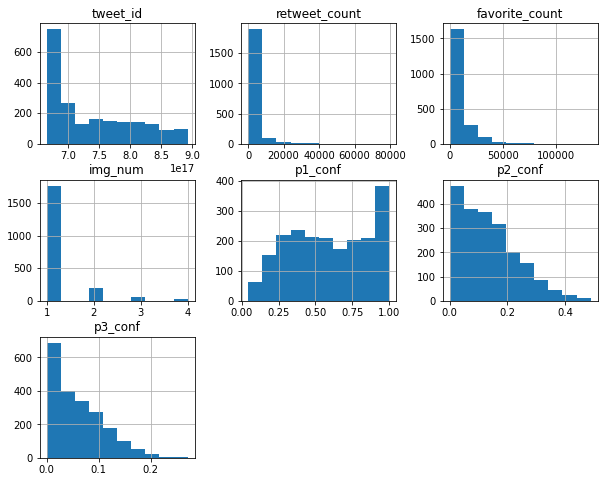

In [53]:
dt.hist(figsize= (10,8));

Golden retriever is the dog type that has the highest percentage of retweet.


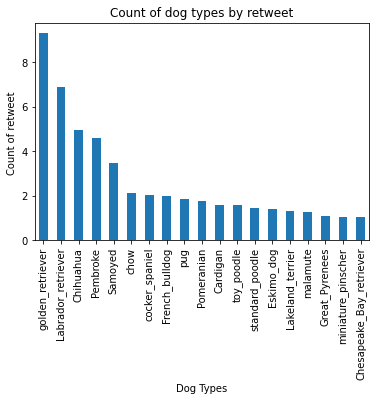

In [54]:
# Retweet calculation

fav_retweet = round(dt.groupby(['p1'])['retweet_count'].sum()/dt['retweet_count'].sum(),5)*100
fav_retweet_1 = fav_retweet.nlargest(n=20)
fav_retweet_1[1:].plot.bar()


plt.xlabel("Dog Types")

plt.ylabel("Count of retweet ")
plt.title("Count of dog types by retweet")
print('Golden retriever is the dog type that has the highest percentage of retweet.')

Golden retriever is the dog type that has the highest percentage of likes.


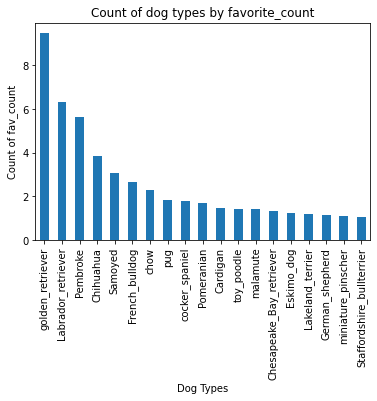

In [55]:
# Favorite count calculation

fav = round(dt.groupby(['p1'])['favorite_count'].sum()/dt['favorite_count'].sum(),5)*100
fav_1 = fav.nlargest(n=20)
fav_1[1:].plot.bar()

plt.xlabel("Dog Types")

plt.ylabel("Count of fav_count")
plt.title("Count of dog types by favorite_count")
print('Golden retriever is the dog type that has the highest percentage of likes.')

Rating is dependent on favorite count.


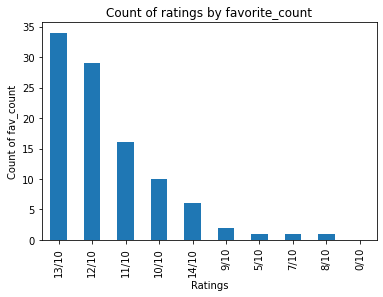

In [56]:
rate = round(dt.groupby(['rating'])['favorite_count'].sum()/dt['favorite_count'].sum(),2)*100
rate_1 = rate.nlargest(n=10)
rate_1.plot.bar()

plt.xlabel("Ratings")

plt.ylabel("Count of fav_count")
plt.title("Count of ratings by favorite_count")

print('Rating is dependent on favorite count.')


Rating is dependent on retweet count.


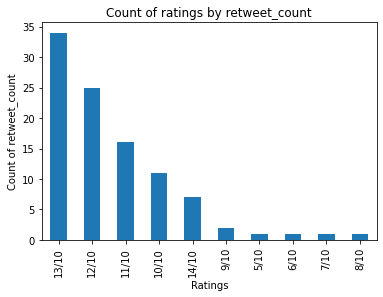

In [57]:
rate_tweet = round(dt.groupby(['rating'])['retweet_count'].sum()/dt['retweet_count'].sum(),2)*100
rate_2 = rate_tweet.nlargest(n=10)
rate_2.plot.bar()

plt.xlabel("Ratings")

plt.ylabel("Count of retweet_count")
plt.title("Count of ratings by retweet_count")

print('Rating is dependent on retweet count.')


<a id='conclusions'></a>
### Conclusion

* Golden retriever has the highest percentage of favorite count, it also has the highest percentage of retweet count.
* Rating is dependent on favorite and retweet count.


### Limitation
The Dog type column (p1) has up to 500 rows that are not available and this affects the count of dog types and other analysis that can be conducted with it. 